# volve-production-analysis


![volve](https://i.ibb.co/GPdnXKT/volve.png)

## About the Volve field
 
The Volve oil field, located 200 kilometres west of Stavanger at the southern end of the Norwegian sector, was decommissioned in September 2016 after 8.5 years in operation, more than twice as long as originally planned.

## About the dataset

In June 2018, the Norwegian Oil & Gas company **Equinor** announced that they would be sharing a complete set of data from the Norwegian continental shelf for research and study purposes, thus granting all academic institutions, students and researchers permission to use this dataset in accordance with the **[Equinor Open Data Licence](https://www.equinor.com/content/dam/statoil/documents/what-we-do/Equinor-HRS-Terms-and-conditions-for-licence-to-data-Volve.pdf)**, without any need for further written permission.

The data used in this notebook is the **Volve production data**, which was released in the form of an excel file made up of two (02) sheets, namely **Daily Production Data** and **Monthly Production Data**.


In [1]:
!pip install jovian --upgrade --quiet
!pip install plotly --upgrade --quiet

In [2]:
jovian.commit(project="volve-production-analysis")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "steveminks644/volve-production-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/steveminks644/volve-production-analysis


'https://jovian.ai/steveminks644/volve-production-analysis'

## Importing necessary libraries

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from urllib.request import urlretrieve

In [4]:
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

## Retrieving the dataset

As I only use the **Monthly Production Data** here, I changed that sheet to a `csv` file which I then uploaded to my **`GitHub`** account from where we will fetch the data.

In [5]:
url = 'https://raw.githubusercontent.com/Lamy237/hello-world/main/volve_production_data.csv'

urlretrieve(url, 'volve_production_data.csv')

('volve_production_data.csv', <http.client.HTTPMessage at 0x7fcf16acd820>)

In [6]:
os.listdir(".")

['.bashrc',
 '.profile',
 '.bash_logout',
 '.jovian',
 '.local',
 '.jupyter',
 '.cache',
 '.ipython',
 '.ipynb_checkpoints',
 'volve_production_data.csv',
 'volve-production-analysis.ipynb',
 '.jovianrc',
 'work',
 '.config',
 '.conda',
 '.git',
 '.npm',
 '.wget-hsts']

In [7]:
volve_df = pd.read_csv('volve_production_data.csv')

In [8]:
volve_df

,Wellbore name,NPDCode,Year,Month,On Stream,Oil,Gas,Water,GI,WI
0,NaN,NaN,NaN,NaN,hrs,Sm3,Sm3,Sm3,Sm3,Sm3
1,15/9-F-1 C,7405.0,2014.0,4.0,228,"11,142","1,597,937",0,NaN,NaN
2,15/9-F-1 C,7405.0,2014.0,5.0,734,"24,902","3,496,230",783,NaN,NaN
3,15/9-F-1 C,7405.0,2014.0,6.0,706,"19,618","2,886,662","2,068",NaN,NaN
4,15/9-F-1 C,7405.0,2014.0,7.0,742,"15,086","2,249,366","6,244",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
522,15/9-F-5,5769.0,2016.0,5.0,732,"9,724","1,534,677","3,950",NaN,0
523,15/9-F-5,5769.0,2016.0,6.0,718,"9,121","1,468,557","2,377",NaN,NaN
524,15/9-F-5,5769.0,2016.0,7.0,669,"9,985","1,602,674","2,454",NaN,0
525,15/9-F-5,5769.0,2016.0,8.0,608,"8,929","1,417,279","2,372",NaN,0


### Some explanations about the columns

- `Wellbore name`: Specifies the name of the wellbore from which the hydrocarbons (Oil & Gas) were produced.
- `NPDCode`: I also don't know what that means but it is probably related to a branch code, something like `Norwegian Petroleum Department Code`.
- `Year` and `Month`: Specifies the year and month during which the hydrocarbons (Oil & Gas) were produced or the water injected, depending on the wellbore.
- `On Stream`: Specifies how much time a particular wellbore has been operated (**in hours**).
- `Oil`, `Gas`, and `Water`: The amount of oil, gas, and water produced from a particular wellbore (**in cubic meters**).
- `GI` and `WI`: The amount of gas injected or water injected through a particular wellbore (**in cubic meters**).


> **A wellbore** in the Oil & Gas industry is a hole that is drilled to aid in the exploration and recovery of natural resources, including oil, gas, or water.

# Explore the dataset

Now let's get some key information about the dataset including:
* Which series in the dataset contains missing values and how many of them
* The different data types (for type conversions if necessary)
* The number of available wellbores

An easy way to get the first two pieces of information mentioned above is to use the method `df.info()`

In [9]:
volve_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Wellbore name  526 non-null    object 
 1   NPDCode        526 non-null    float64
 2   Year           526 non-null    float64
 3   Month          526 non-null    float64
 4   On Stream      516 non-null    object 
 5   Oil            312 non-null    object 
 6   Gas            312 non-null    object 
 7   Water          312 non-null    object 
 8   GI             1 non-null      object 
 9   WI             202 non-null    object 
dtypes: float64(3), object(7)
memory usage: 41.3+ KB


As you can see, only the first four (04) series of our dataset do not contain missing values. All the remaining series contain some missing or NaN values. In order to know precisely how many missing values are present in each series, you can simply subtract the **Non-Null Count** the to range index (number of rows) or use the methods `isna()` and `sum()`.

In [10]:
# Number of NaN values for each series
volve_df.isna().sum()

Wellbore name      1
NPDCode            1
Year               1
Month              1
On Stream         11
Oil              215
Gas              215
Water            215
GI               526
WI               325
dtype: int64

To get the number of available wellbores, you can use the `df.unique()` method

In [11]:
volve_df['Wellbore name'].unique()

array([nan, '15/9-F-1 C', '15/9-F-11', '15/9-F-12', '15/9-F-14',
       '15/9-F-15 D', '15/9-F-4', '15/9-F-5'], dtype=object)

We can see that we have got a total of seven (07) wellbores in our Oil & Gas field.

**Note:** The NaN value at the beginning is due to the first row.

# Data cleaning and transformation

## Drop the first row

The first row of the dataset contains the measurement units for various columns. However, being a part of our data frame, this might lead us to mistakes while trying the make some calculations or type conversions. So the best option would be to remove that row from our data frame.

**Note:** Do not forget to reset the indices using `df.reset_index`.

In [12]:
# Dropping the first row
volve_df.drop([0], inplace=True)

In [13]:
# Resetting the indices
volve_df.reset_index(drop=True, inplace=True)

In [14]:
volve_df

,Wellbore name,NPDCode,Year,Month,On Stream,Oil,Gas,Water,GI,WI
0,15/9-F-1 C,7405.0,2014.0,4.0,228,"11,142","1,597,937",0,NaN,NaN
1,15/9-F-1 C,7405.0,2014.0,5.0,734,"24,902","3,496,230",783,NaN,NaN
2,15/9-F-1 C,7405.0,2014.0,6.0,706,"19,618","2,886,662","2,068",NaN,NaN
3,15/9-F-1 C,7405.0,2014.0,7.0,742,"15,086","2,249,366","6,244",NaN,NaN
4,15/9-F-1 C,7405.0,2014.0,8.0,433,"6,970","1,048,191","4,530",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
521,15/9-F-5,5769.0,2016.0,5.0,732,"9,724","1,534,677","3,950",NaN,0
522,15/9-F-5,5769.0,2016.0,6.0,718,"9,121","1,468,557","2,377",NaN,NaN
523,15/9-F-5,5769.0,2016.0,7.0,669,"9,985","1,602,674","2,454",NaN,0
524,15/9-F-5,5769.0,2016.0,8.0,608,"8,929","1,417,279","2,372",NaN,0


## Handle missing values

Now that we are aware of the presence of missing or NaN values in our dataset, it would be great to handle them one way or another in order to make our operations simpler. There are various ways of handling missing values but in this case, let's just replace all the missing values with zero (0) using the method `df.fillna()`.

In [15]:
volve_df.fillna(0, inplace=True)

In [16]:
# All the NaN values were replaced by zero (0)
volve_df.head()

,Wellbore name,NPDCode,Year,Month,On Stream,Oil,Gas,Water,GI,WI
0,15/9-F-1 C,7405.0,2014.0,4.0,228,"11,142","1,597,937",0,0,0
1,15/9-F-1 C,7405.0,2014.0,5.0,734,"24,902","3,496,230",783,0,0
2,15/9-F-1 C,7405.0,2014.0,6.0,706,"19,618","2,886,662","2,068",0,0
3,15/9-F-1 C,7405.0,2014.0,7.0,742,"15,086","2,249,366","6,244",0,0
4,15/9-F-1 C,7405.0,2014.0,8.0,433,"6,970","1,048,191","4,530",0,0


In [17]:
volve_df.sample(5)

,Wellbore name,NPDCode,Year,Month,On Stream,Oil,Gas,Water,GI,WI
459,15/9-F-5,5769.0,2011.0,3.0,728,0,0,0,0,"184,592"
156,15/9-F-12,5599.0,2015.0,10.0,739,"11,889","1,821,328","38,151",0,0
354,15/9-F-4,5693.0,2011.0,10.0,329,0,0,0,0,"77,828"
142,15/9-F-12,5599.0,2014.0,8.0,593,"4,448","704,538","126,629",0,0
22,15/9-F-1 C,7405.0,2016.0,2.0,484,"4,718","742,340","15,946",0,0


## Get rid of commas

One thing that might get your attention here is that the series `Oil`, `Gas`, `Water`, and `WI` all contain commas in their values. However, since our data frame is reading from a `csv` file, this might lead to errors or confusion when trying to convert the data types of the concerned series.

A way to handle this might be to get rid of those commas using the `df.replace()` method.

In [18]:
volve_df[['Oil', 'Gas', 'Water', 'WI']] = volve_df[['Oil', 'Gas', 'Water', 'WI']].replace(',', '', regex=True)

In [19]:
volve_df.sample(5)

,Wellbore name,NPDCode,Year,Month,On Stream,Oil,Gas,Water,GI,WI
163,15/9-F-12,5599.0,2016.0,5.0,741,5865,925514,36148,0,0
193,15/9-F-14,5351.0,2010.0,3.0,654,66989,9421805,64561,0,0
306,15/9-F-4,5693.0,2007.0,10.0,0,0,0,0,0,0
315,15/9-F-4,5693.0,2008.0,7.0,621,0,0,0,0,232030
487,15/9-F-5,5769.0,2013.0,7.0,654,0,0,0,0,131249


## Type conversions

Now let's transform our data by converting various data types into appropriate ones wherever some transformation is needed.

In [20]:
# Display the different data types
volve_df.dtypes

Wellbore name     object
NPDCode          float64
Year             float64
Month            float64
On Stream         object
Oil               object
Gas               object
Water             object
GI                 int64
WI                object
dtype: object

Here, we can see that all the series except `Wellbore name` do need some type conversion so we are going to transform our data as follow:
 - NPDCode, Year, and Month : `float` to `int`
 - On Stream, Oil, Gas, Water, GI, WI : `object` to `float`
 
Note that in this case, it is neither compulsory nor necessary to convert the series `GI` (Gas Injection) into `float`, since all of its values are equal to zero (0). However, this might not be the case in another dataset of the same format. So I am only converting it into `float` for convenience.

**Note:** Another option would be to drop that column.

In [21]:
volve_df[['NPDCode', 'Year', 'Month']] = volve_df[['NPDCode', 'Year', 'Month']].astype(int)

In [22]:
volve_df[['On Stream', 'Oil', 'Gas', 'Water', 'GI', 'WI']] = volve_df[['On Stream', 'Oil', 'Gas', 'Water', 'GI', 'WI']].astype(float)

An even better transformation would be to convert the `Month` column from **int** to **string** using month abbreviations.

In [23]:
# Convert the Month column from int to string (Ex: 1 -> Jan, 2-> Feb, ...etc)
import calendar

abbreviations = dict(enumerate(calendar.month_abbr))
volve_df['Month'] = volve_df['Month'].map(abbreviations)

Specify a custom order in which you want the months to be sorted. Otherwise they will be sorted by alphabetic order.

In [24]:
volve_df['Month'] = pd.Categorical(volve_df.Month, 
                             categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                             ordered=True)

The pandas method `pd.Categorical()` converts the passed column into a data type named **category**, which allows you to specify a custom order for the concerned series to be sorted in.

For more information about this method, check the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Categorical.html).

In [25]:
volve_df.head()

,Wellbore name,NPDCode,Year,Month,On Stream,Oil,Gas,Water,GI,WI
0,15/9-F-1 C,7405,2014,Apr,228.0,11142.0,1597937.0,0.0,0.0,0.0
1,15/9-F-1 C,7405,2014,May,734.0,24902.0,3496230.0,783.0,0.0,0.0
2,15/9-F-1 C,7405,2014,Jun,706.0,19618.0,2886662.0,2068.0,0.0,0.0
3,15/9-F-1 C,7405,2014,Jul,742.0,15086.0,2249366.0,6244.0,0.0,0.0
4,15/9-F-1 C,7405,2014,Aug,433.0,6970.0,1048191.0,4530.0,0.0,0.0


### Reason why I am not parsing the date

Now you should probably be wondering "***Why aren't we parsing the dates by combining the series `Year` and `Month` ?***"

Well, let's suppose we want to combine those two (02) columns into a new one `volve_df['Date']`. Regardless of whatever method we will employ, we will have to specify the day, since the date format is `YY-MM-DD`. 

You will then agree with me that adding a day here might lead us to faulty data, given that we have no proof that all of the Oil, Gas, and Water production in a particular month was accomplished in a single day.

**Note :** If you do not agree with me and/or know a better way to approach this problem, I am open to any suggestions.

In [26]:
# All the conversions were successful
volve_df.dtypes

Wellbore name      object
NPDCode             int64
Year                int64
Month            category
On Stream         float64
Oil               float64
Gas               float64
Water             float64
GI                float64
WI                float64
dtype: object

# Analysis and visualization

Now let's analyze our data and visualize the production using various plots.

In [27]:
# Calculating the total Oil, Gas, and Water produced
total_oil = volve_df.Oil.sum()
total_gas = volve_df.Gas.sum()
total_water = volve_df.Water.sum()

total_production = total_oil + total_gas + total_water

In [28]:
print(f"The total oil produced is {total_oil} cubic meters.")
print(f"The total gas produced is {total_gas} cubic meters.")
print(f"The total water produced is {total_water} cubic meters.")

The total oil produced is 10037088.0 cubic meters.
The total gas produced is 1475370434.0 cubic meters.
The total water produced is 15318575.0 cubic meters.


In [29]:
values = [total_oil, total_gas, total_water]
labels = ['Oil', 'Gas', 'Water']


fig = px.pie(values=values, names=labels, hole=.4, color=labels, labels=labels,
             color_discrete_map={'Oil':'lime', 'Gas':'red', 'Water':'blue'},
             title="<b>Fluid production fraction</b>")

fig.update_traces(hovertemplate="<br>".join(["Fluid: %{label}", "Production: %{value} Sm<sup>3</sup>"]))

fig.update_layout(font_size=14)

fig.show()

The above graph shows us that the fluid production mostly consisted of Gas **(98.3%)**, the liquid (Oil & Water) production representing less than **2%** of the total production.

## Creating additional columns

Now we might want to keep track of the total amount of `Oil`, `Gas`, and `Water` produced from the field at the end of each month and maybe the total production too. So instead of having to compute the sum of Oil, Gas, or Water produced continuously, we can just add new columns in our data frame to show us exactly what we want.

Before adding new columns to calculate the cumulated Oil, Gas, and Water produced, we must first sort our data frame by **Year** and **Month** in order to avoid mistaken outputs. So let's create a new data frame that we will name `sorted_df`.

In [30]:
sorted_df = volve_df.sort_values(['Year', 'Month'])

In [31]:
# Here, I prefer to reset the indices but it is your choice do it or not
sorted_df.reset_index(drop=True, inplace=True)

In [32]:
sorted_df

,Wellbore name,NPDCode,Year,Month,On Stream,Oil,Gas,Water,GI,WI
0,15/9-F-4,5693,2007,Sep,0.0,0.0,0.0,0.0,0.0,0.0
1,15/9-F-5,5769,2007,Sep,0.0,0.0,0.0,0.0,0.0,0.0
2,15/9-F-4,5693,2007,Oct,0.0,0.0,0.0,0.0,0.0,0.0
3,15/9-F-5,5769,2007,Oct,0.0,0.0,0.0,0.0,0.0,0.0
4,15/9-F-4,5693,2007,Nov,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
521,15/9-F-4,5693,2016,Sep,340.0,0.0,0.0,0.0,0.0,61201.0
522,15/9-F-5,5769,2016,Sep,0.0,0.0,0.0,0.0,0.0,0.0
523,15/9-F-4,5693,2016,Oct,0.0,0.0,0.0,0.0,0.0,0.0
524,15/9-F-4,5693,2016,Nov,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# Adding new columns to compute the cumulated Oil, Gas, and Water produced
sorted_df['cum_oil'] = sorted_df.Oil.cumsum()
sorted_df['cum_gas'] = sorted_df.Gas.cumsum()
sorted_df['cum_water'] = sorted_df.Water.cumsum()

sorted_df['total_production'] = sorted_df['cum_oil'] + sorted_df['cum_gas'] + sorted_df['cum_water']

In [34]:
sorted_df

,Wellbore name,NPDCode,Year,Month,On Stream,Oil,Gas,Water,GI,WI,cum_oil,cum_gas,cum_water,total_production
0,15/9-F-4,5693,2007,Sep,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00
1,15/9-F-5,5769,2007,Sep,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00
2,15/9-F-4,5693,2007,Oct,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00
3,15/9-F-5,5769,2007,Oct,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00
4,15/9-F-4,5693,2007,Nov,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,15/9-F-4,5693,2016,Sep,340.0,0.0,0.0,0.0,0.0,61201.0,10037088.0,1.475370e+09,15318575.0,1.500726e+09
522,15/9-F-5,5769,2016,Sep,0.0,0.0,0.0,0.0,0.0,0.0,10037088.0,1.475370e+09,15318575.0,1.500726e+09
523,15/9-F-4,5693,2016,Oct,0.0,0.0,0.0,0.0,0.0,0.0,10037088.0,1.475370e+09,15318575.0,1.500726e+09
524,15/9-F-4,5693,2016,Nov,0.0,0.0,0.0,0.0,0.0,0.0,10037088.0,1.475370e+09,15318575.0,1.500726e+09


# Field Production analysis
Now that we pretty much have all the data we need in our data frame, let's try to analyze the overall production of our Oil & Gas field (Not wellbore wise) using various charts/plots.

In [35]:
# Create a data frame that only contains the data related to hydrocarbon (Oil & Gas) and water production per year
annual_df = sorted_df.groupby('Year')[['Oil', 'Gas', 'Water']].sum()

In [36]:
annual_df

,Oil,Gas,Water
Year,,,
2007,0.0,0.0,0.0
2008,1764375.0,257038586.0,23508.0
2009,2684394.0,375982012.0,232102.0
2010,1689902.0,243948373.0,1887594.0
2011,847964.0,130320196.0,2190641.0
2012,574208.0,90208642.0,2109599.0
2013,558016.0,87587778.0,2576365.0
2014,743108.0,111791875.0,2716069.0
2015,861750.0,128423842.0,2009830.0


Now let's add the cumulated hydrocarbon and water production per year.

In [37]:
annual_df['cum_oil'] = sorted_df.groupby('Year')[['Oil']].sum().cumsum()
annual_df['cum_gas'] = sorted_df.groupby('Year')[['Gas']].sum().cumsum()
annual_df['cum_water'] = sorted_df.groupby('Year')[['Water']].sum().cumsum()

# Note: Another and probably simpler alternative to do this would be to use the newly created dataframe with the syntax
# annual_df['cum_oil'] = annual_df.Oil.cumsum()

In [38]:
annual_df

,Oil,Gas,Water,cum_oil,cum_gas,cum_water
Year,,,,,,
2007,0.0,0.0,0.0,0.0,0.000000e+00,0.0
2008,1764375.0,257038586.0,23508.0,1764375.0,2.570386e+08,23508.0
2009,2684394.0,375982012.0,232102.0,4448769.0,6.330206e+08,255610.0
2010,1689902.0,243948373.0,1887594.0,6138671.0,8.769690e+08,2143204.0
2011,847964.0,130320196.0,2190641.0,6986635.0,1.007289e+09,4333845.0
2012,574208.0,90208642.0,2109599.0,7560843.0,1.097498e+09,6443444.0
2013,558016.0,87587778.0,2576365.0,8118859.0,1.185086e+09,9019809.0
2014,743108.0,111791875.0,2716069.0,8861967.0,1.296877e+09,11735878.0
2015,861750.0,128423842.0,2009830.0,9723717.0,1.425301e+09,13745708.0


In [39]:
layout = go.Layout(title='<b>Annual Oil Production (Sm<sup>3</sup>)</b>',
                   xaxis_title='Year',
                   yaxis_title='Oil Production',
                   height=580,
                   font_size=14)


fig = go.Figure(layout=layout)

fig.add_traces(data=go.Bar(x=annual_df.index, y=annual_df.Oil,
                           marker=dict(color='lime', line=dict(color='white', width=1.2)),
                           opacity=.9,
                           hovertemplate='<br>'.join(['Year = %{x}', 'Oil = %{y}']),
                           name='Distribution'))

fig.add_traces(data=go.Scatter(x=annual_df.index, y=annual_df.Oil,
                               line=dict(dash='dash', color='red', width=3),
                               marker_size=10,
                               hovertemplate='<br>'.join(['Year = %{x}', 'Oil = %{y}']),
                               name='Profile'))

fig.show()

The above graph shows us that there was a peak in the oil production in the year **2009** and then the production started decreasing progressively up to **2013** before slightly increasing again between **2014** and **2015**.

In [40]:
layout = go.Layout(title='<b>Annual Gas Production (Sm<sup>3</sup>)</b>',
                   xaxis_title='Year',
                   yaxis_title='Gas Production',
                   height=580,
                   font_size=14)


fig = go.Figure(layout=layout)

fig.add_traces(data=go.Bar(x=annual_df.index, y=annual_df.Gas,
                           marker=dict(color='tomato', line=dict(color='white', width=1.2)),
                           hovertemplate='<br>'.join(['Year = %{x}', 'Gas = %{y}']),
                           name='Distribution'))

fig.add_traces(data=go.Scatter(x=annual_df.index, y=annual_df.Gas,
                               line=dict(dash='dash', color='darkcyan', width=3),
                               marker_size=10,
                               hovertemplate='<br>'.join(['Year = %{x}', 'Gas = %{y}']),
                               name='Profile'))

fig.show()

The gas production scenario is quite similar to that of oil, the only difference being in the quantities of fluid produced.

In [41]:
layout = go.Layout(title='<b>Cum Oil Vs. Cum Water Production (Sm<sup>3</sup>)</b>',
                   xaxis_title='Year',
                   yaxis_title='Cumulative Production',
                   hovermode='x unified',
                   height=580,
                   font_size=14)


fig = go.Figure(layout=layout)

fig.add_traces(data=go.Scatter(x=annual_df.index, y=annual_df.cum_oil,
                               line=dict(color='green', width=3),
                               marker_size=10,
                               name='Cum Oil'))

fig.add_traces(data=go.Scatter(x=annual_df.index, y=annual_df.cum_water,
                               line=dict(dash='dash', color='blue', width=3),
                               marker=dict(symbol='square', size=10),
                               name='Cum Water'))

fig.show()

The above graph shows us that the frequency of oil production decreases with time while that of water is almost constant. We might then come to the conclusion that the decline in the frequency of oil production is due to the water breakthrough.

In [42]:
layout = go.Layout(title='<b>Oil Vs. Water Production (Sm<sup>3</sup>)</b>',
                   xaxis_title='Year',
                   yaxis_title='Total Production',
                   height=580,
                   hovermode='x unified',
                   font_size=14)


fig = go.Figure(layout=layout)

fig.add_traces(data=go.Scatter(x=annual_df.index, y=annual_df.Oil,
                               line=dict(color='lime', width=3),
                               marker_size=10,
                               name='Oil'))

fig.add_traces(data=go.Scatter(x=annual_df.index, y=annual_df.Water,
                               line=dict(dash='dash', color='blue', width=3),
                               marker=dict(symbol='square', size=10),
                               name='Water'))

fig.show()

The above plot further confirms our interpretation of the previous one, as we can clearly see the decline in Oil production as Water production increases.

However, between **2014** and **2015**, there was a slight increase in Oil production due to a decrease in Water production. We can then suppose that some **Polymer assisted water flooding** might have been performed, hence causing the decline in water production. However, we will have to check the reports in order to confirm whether it was indeed the case or not. 

In [43]:
# Create a data frame to account for the monthly Oil production
monthly_oil_df = sorted_df.pivot_table('Oil', 'Month', 'Year')
monthly_oil_df

Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Month,,,,,,,,,,
Jan,NaN,0.00,67312.50,57970.00,26518.75,11381.75,11898.50,10318.500000,11606.857143,7368.000000
Feb,NaN,12272.75,58946.50,41279.75,18305.75,16040.00,10420.75,9492.666667,9467.571429,6766.857143
Mar,NaN,20840.25,45900.75,42140.25,23526.25,15356.50,6280.75,10360.500000,11676.857143,6114.857143
Apr,NaN,18633.00,59475.00,39822.50,22408.50,15149.50,8806.50,10885.428571,12889.142857,4615.714286
May,NaN,31369.75,64303.50,41230.75,22081.75,14366.75,10993.75,11975.428571,12437.714286,6505.000000
Jun,NaN,35946.75,54771.00,36231.75,13305.25,13138.25,8549.50,11362.714286,11978.285714,5943.166667
Jul,NaN,41570.00,42744.25,33410.00,8168.25,13542.00,7677.60,10711.571429,10570.714286,5176.666667
Aug,NaN,41360.75,56227.00,17132.75,21527.50,5422.00,12462.00,7053.571429,8042.285714,4159.166667
Sep,0.0,48065.75,45112.25,26679.50,20263.00,667.25,10174.00,8912.857143,9013.857143,1434.833333


Here, we can see that after pivoting our data frame, the first column (`2007`) contains NaN values from **January** to **August**. This is due to the fact that in the original dataset, the given production data started from **September 2007**. 

Indeed, when converting a data frame into a pivot table, each of the indexes of the data frame are kept, hence the months from **January** to **August** were added to the column `2007` and since there was no data available for these months in that particular year, the value NaN was automatically passed.

In [44]:
# Let's replace these NaN values by zero (0)
monthly_oil_df.fillna(0, inplace=True)

In [45]:
fig = px.imshow(monthly_oil_df,
                color_continuous_scale='Greens',
                labels=dict(x='Year', y='Month'),
                title='<b>Monthly Oil Production</b>',
                #height=500
               )

fig.update_traces(hovertemplate="<br>".join(['Year: %{x}', 'Month:  %{y}', 'Produced Oil (Sm<sup>3</sup>): %{z}']), name='')

fig.update_layout(font_size=14)

Here, we can see that although the given data start from **September 2007**, the actual Oil production only started in **February 2008** and the highest recorded production was done between **December 2008** and **January 2009**.

Now let's do same for the gas production.

In [46]:
monthly_gas_df = sorted_df.pivot_table('Gas', 'Month', 'Year')
monthly_gas_df

Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Month,,,,,,,,,,
Jan,NaN,0.00,9743419.75,8151476.50,4044301.25,1719683.00,1928974.00,1.534545e+06,1.711483e+06,1.153664e+06
Feb,NaN,1767002.25,8420357.25,5817959.50,2837334.25,2472121.00,1664395.25,1.422451e+06,1.432248e+06,1.066947e+06
Mar,NaN,3047792.75,6456502.50,5925081.00,3623493.50,2413593.75,959364.75,1.558111e+06,1.718937e+06,9.857524e+05
Apr,NaN,2876610.25,8214441.00,5612404.00,3482426.00,2384845.00,1432887.25,1.608094e+06,1.879311e+06,7.554077e+05
May,NaN,4772968.00,8827850.50,5865169.25,3443667.00,2281586.50,1820921.75,1.689433e+06,1.814370e+06,1.026326e+06
Jun,NaN,5378083.50,7482339.25,5175277.75,2061984.50,2093764.25,1422490.75,1.672519e+06,1.753854e+06,9.564768e+05
Jul,NaN,6163825.75,5962456.75,4839227.75,1222079.25,2156507.75,1212720.80,1.597607e+06,1.571420e+06,8.316482e+05
Aug,NaN,5980885.00,7835243.00,2472439.00,3282031.25,837597.25,1897149.40,1.092411e+06,1.217787e+06,6.652015e+05
Sep,0.0,6881614.75,6279513.75,4002690.75,3146947.75,100725.25,1563249.80,1.398336e+06,1.359741e+06,2.431360e+05


In [47]:
monthly_gas_df.fillna(0, inplace=True)

In [48]:
fig = px.imshow(monthly_gas_df,
                color_continuous_scale='Reds',
                labels=dict(x='Year', y='Month'),
                title='<b>Monthly Gas Production</b>',
                #height=500
               )

fig.update_traces(hovertemplate="<br>".join(['Year: %{x}', 'Month:  %{y}', 'Produced Gas (Sm<sup>3</sup>): %{z}']), name='')

fig.update_layout(font_size=14)

fig.show()

Again, we see that the scenario here is pretty similar to that of Oil production, the only difference being in the quantities.

In [49]:
sns.set_style('darkgrid')

In [50]:
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

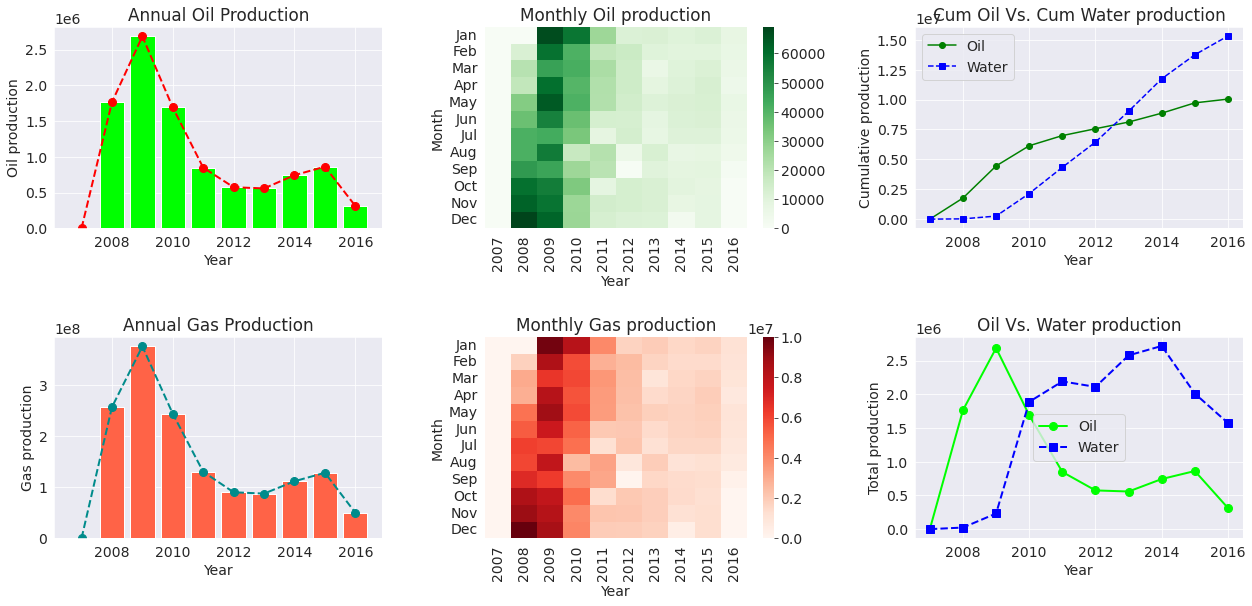

In [51]:
# Plotting all the graphs in a single grid

fig, axes = plt.subplots(2, 3, figsize=(18, 9))

# Annual Oil production
axes[0, 0].bar(annual_df.index, annual_df.Oil, color='lime')
axes[0, 0].plot(annual_df.index, annual_df.Oil, marker='o', ms=8, ls='--', lw=2, c='red')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Oil production')
axes[0, 0].set_title('Annual Oil Production')

# Monthly Oil production
axes[0, 1].set_title('Monthly Oil production')
sns.heatmap(monthly_oil_df, cmap='Greens', ax=axes[0, 1])

# Cum Oil Vs. Cum Water
axes[0, 2].plot(annual_df.index, annual_df.cum_oil, 'o-g')
axes[0, 2].plot(annual_df.index, annual_df.cum_water, 's--b')
axes[0, 2].set_xlabel('Year')
axes[0, 2].set_ylabel('Cumulative production')
axes[0, 2].set_title('Cum Oil Vs. Cum Water production')
axes[0, 2].legend(['Oil', 'Water'])

# Annual Gas production
axes[1, 0].bar(annual_df.index, annual_df.Gas, color='tomato')
axes[1, 0].plot(annual_df.index, annual_df.Gas, marker='o', ms=8, ls='--', lw=2, c='darkcyan')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Gas production')
axes[1, 0].set_title('Annual Gas Production')

# Monthly Gas production
axes[1, 1].set_title('Monthly Gas production')
sns.heatmap(monthly_gas_df, cmap='Reds', ax=axes[1, 1])

# Oil production Vs. Water production
axes[1, 2].plot(annual_df.index, annual_df.Oil, marker='o', ms=8, ls='-', lw=2, c='lime')
axes[1, 2].plot(annual_df.index, annual_df.Water, marker='s', ms=8, ls='--', lw=2, c='blue')
axes[1, 2].set_xlabel('Year')
axes[1, 2].set_ylabel('Total production')
axes[1, 2].set_title('Oil Vs. Water production')
axes[1, 2].legend(['Oil', 'Water'])


plt.tight_layout(pad=2)

# Overall Wellbore production analysis

Although we have done the overall field production analysis including the annual and monthly analysis, we might also want to know:
* What amount of the produced hydrocarbons was extracted from a each wellbore ?
* What amount of gas or water was injected through them ?
* Which of the wellbores were production wells and which ones were injection wells ?

Let's start by creating a data frame to account for the total production per wellbore, `wellbores_df`.

In [52]:
wellbores_df = volve_df.groupby(['Wellbore name'], as_index=False)[['On Stream', 'Oil', 'Gas', 'Water', 'GI', 'WI']].sum()

In [53]:
wellbores_df

,Wellbore name,On Stream,Oil,Gas,Water,GI,WI
0,15/9-F-1 C,9984.0,177709.0,26440919.0,207301.0,0.0,0.0
1,15/9-F-11,26006.0,1147853.0,174310519.0,1090807.0,0.0,0.0
2,15/9-F-12,65204.0,4579613.0,667542277.0,6833318.0,0.0,0.0
3,15/9-F-14,62778.0,3942234.0,578009542.0,7121246.0,0.0,0.0
4,15/9-F-15 D,17823.0,148519.0,22505351.0,52369.0,0.0,0.0
5,15/9-F-4,64271.0,0.0,0.0,0.0,0.0,16240727.0
6,15/9-F-5,60827.0,41160.0,6561826.0,13534.0,0.0,14089406.0


Here, we can see that the wellbore **`15/9-F-4`** was only used for water injection and that the wellbore **`15/9-F-5`** was used for both production and water injection.
However, let's analyze our newly created data frame with the help of various plots.

In [54]:
fig = px.bar(wellbores_df, x='Wellbore name', y='Oil',
             color='Wellbore name',
             color_discrete_sequence=px.colors.sequential.Aggrnyl)

fig.update_traces(marker_line_color='white', marker_line_width=1.2, showlegend=False)

fig.update_layout(title='<b>Total Oil Production per Wellbore (Sm<sup>3</sup>)</b>',
                  height=580, width=900,
                  font_size=14)

fig.show()

The above graph shows us that the wellbore `15/9-F-12` produced the highest amount of Oil, while the wellbore `15/9-F-4` did not produce anything at all.

**Note:** Yes I know, we could see it by simply displaying the data frame like we did before. But suppose there were dozens of wellbores, it wouldn't have been as easy to just look at the data frame. So my goal here is to bring us to that conclusion with the help of graphs.

In [55]:
fig = px.bar(wellbores_df, x='Wellbore name', y='Gas',
             color='Wellbore name',
             color_discrete_sequence=px.colors.sequential.Sunsetdark_r)

fig.update_traces(marker_line_color='white', marker_line_width=1.2, showlegend=False)

fig.update_layout(title='<b>Total Gas Production per Wellbore (Sm<sup>3</sup>)</b>',
                  height=580, width=900,
                  font_size=14)

fig.show()

The scenario being similar for Gas production, we can conclude that neither Oil nor Gas was produced from the wellbore `15/9-F-4`.

So we can come to two (02) possible hypothesis concerning that wellbore:
1. The wellbore was closed and/or abandoned for a certain reason (we'll have to check the reports)
2. The wellbore is an injection well

To know which of the two (02) hypothesis is true, we can take a look at the time `On Stream`. Indeed, if the well was closed or abandoned, its operating time would then be equal to zero (0). However, if the operating is not equal to zero (0), then it means the wellbore was still operated and the only purpose other than production for which a wellbore would be kept in operation is **Injection**.

In [56]:
fig = px.bar(wellbores_df, x='Wellbore name', y='On Stream',
             color='Wellbore name',
             title='<b>Total Operating time (hrs)</b>',
             color_discrete_sequence=px.colors.qualitative.D3)

fig.update_traces(marker_line_color='white', marker_line_width=1.2, showlegend=False)

fig.update_layout(font_size=14, height=580, width=900)

fig.show()

The time `On Stream` for the wellbore `15/9-F-4` is well greater than zero (0). Hence, it was definitely an **Injection well**.

**Problem:** We know from the previously displayed data frame that the wellbore `15/9-F-4` is not the only wellbore to have been used for injection. However, none of the above plots show us that. Depending on what we want to analyze, we might want to know which of the wells are **production wells** and which ones are **injection wells**.

In [57]:
# Creating a data frame for injection wells
injection_wells_df = wellbores_df.loc[(wellbores_df.WI > 0) | (wellbores_df.GI > 0)].reset_index(drop=True)

In the above cell, I am querying for all the wellbores from which water or gas might have been injected and storing those wellbores in a new data frame. 

>**Yes but why querying for Gas Injection (GI) too? Isn't it equal to zero for all the wellbores?**
>
> You are absolutely right but again, this might not be the case for another dataset of the same format. And since we want our code to be as flexible and versatile as possible, it is more convenient to also query for gas injection.

In [58]:
injection_wells_df

,Wellbore name,On Stream,Oil,Gas,Water,GI,WI
0,15/9-F-4,64271.0,0.0,0.0,0.0,0.0,16240727.0
1,15/9-F-5,60827.0,41160.0,6561826.0,13534.0,0.0,14089406.0


We see that there are two (02) wellbores that were used for injection, namely `15/9-F-4` and `15/9-F-5`.

In [59]:
fig = px.bar(injection_wells_df, x='Wellbore name', y='WI',
             color_discrete_sequence=['deepskyblue'],
             labels=dict(WI='Injected Water'))

fig.update_traces(marker_line_color='white', marker_line_width=1.2)

fig.update_layout(title='<b>Total injected water (Sm<sup>3</sup>)</b>',
                  height=580, width=900,
                  font_size=14)

fig.show()

Adding the above graph to the previous ones, we can now see that the wellbore `15/9-F-5` was used for both production and injection without having to look directly into the data frame.

**Note :** Since there is no gas injection here, we are not making any graph for the same. But if there were some gas injection, we would have used a stacked bar plot or another bar plot to visualize both water and gas injection.

In [60]:
# Creating a data frame for production wells
production_wells_df = wellbores_df.loc[(wellbores_df.Oil > 0) | (wellbores_df.Gas > 0) | (wellbores_df.Water > 0)].reset_index(drop=True)

In [61]:
production_wells_df

,Wellbore name,On Stream,Oil,Gas,Water,GI,WI
0,15/9-F-1 C,9984.0,177709.0,26440919.0,207301.0,0.0,0.0
1,15/9-F-11,26006.0,1147853.0,174310519.0,1090807.0,0.0,0.0
2,15/9-F-12,65204.0,4579613.0,667542277.0,6833318.0,0.0,0.0
3,15/9-F-14,62778.0,3942234.0,578009542.0,7121246.0,0.0,0.0
4,15/9-F-15 D,17823.0,148519.0,22505351.0,52369.0,0.0,0.0
5,15/9-F-5,60827.0,41160.0,6561826.0,13534.0,0.0,14089406.0


In [62]:
fig = px.bar(production_wells_df, x='Wellbore name', y='Oil',
             color='Wellbore name',
             color_discrete_sequence=px.colors.sequential.Aggrnyl)

fig.update_traces(marker_line_color='white', marker_line_width=1.2, showlegend=False)

fig.update_layout(title='<b>Total Oil Production per Wellbore (Sm<sup>3</sup>)</b>',
                  height=580, width=900,
                  font_size=14)

fig.show()

In [63]:
fig = px.bar(production_wells_df, x='Wellbore name', y='Gas',
             color='Wellbore name',
             color_discrete_sequence=px.colors.sequential.Sunsetdark_r)

fig.update_traces(marker_line_color='white', marker_line_width=1.2, showlegend=False)

fig.update_layout(title='<b>Total Gas Production per Wellbore (Sm<sup>3</sup>)</b>',
                  height=580, width=900,
                  font_size=14)

fig.show()

Yes, I know the last two (02) steps look a bit repetitive. But it was important to show you why we needed to create two (02) additional data frames to account for productions wells and injections wells.

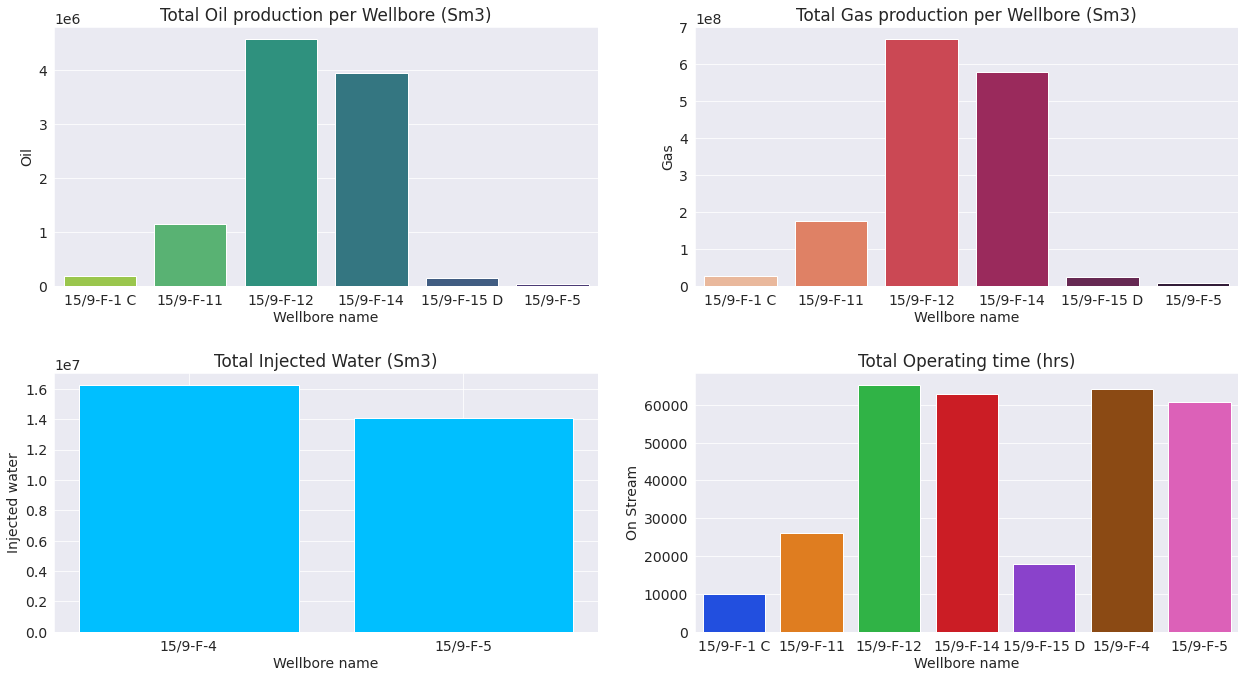

In [64]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))


axes[0, 0].set_title('Total Oil production per Wellbore (Sm3)')
sns.barplot(x='Wellbore name', y='Oil', palette='viridis_r', data=production_wells_df, ax=axes[0, 0])


axes[0, 1].set_title('Total Gas production per Wellbore (Sm3)')
sns.barplot(x='Wellbore name', y='Gas', palette='rocket_r', data=production_wells_df, ax=axes[0, 1])


axes[1, 0].set_title('Total Injected Water (Sm3)')
axes[1, 0].set_xlabel('Wellbore name')
axes[1, 0].set_ylabel('Injected water')
axes[1, 0].bar(x='Wellbore name', height='WI', color='deepskyblue', data=injection_wells_df)


axes[1, 1].set_title('Total Operating time (hrs)')
sns.barplot(x='Wellbore name', y='On Stream', data=wellbores_df, palette='bright', ax=axes[1, 1])


plt.tight_layout(pad=2)

# Individual Wellbore production analysis

Now let's say we want to analyze a wellbore in particular. Maybe we want to know its oil production, gas production, operating time, ...etc throughout the years. We will have to create a new data frame to store the data of that particular wellbore.

Suppose we want to analyze the wellbore `15/9-F-5` for example.

## Well 15/9-F-5 : Production and Injection well

In [65]:
# Creating a data frame to store all data about the wellbore 15/9-F-5
well_f5_df = sorted_df[sorted_df['Wellbore name'] == '15/9-F-5'].drop(columns=['cum_oil', 'cum_gas', 'cum_water', 'total_production'])

In [66]:
# Resetting the indices
well_f5_df.reset_index(drop=True, inplace=True)

In [67]:
well_f5_df.head()

,Wellbore name,NPDCode,Year,Month,On Stream,Oil,Gas,Water,GI,WI
0,15/9-F-5,5769,2007,Sep,0.0,0.0,0.0,0.0,0.0,0.0
1,15/9-F-5,5769,2007,Oct,0.0,0.0,0.0,0.0,0.0,0.0
2,15/9-F-5,5769,2007,Nov,0.0,0.0,0.0,0.0,0.0,0.0
3,15/9-F-5,5769,2007,Dec,0.0,0.0,0.0,0.0,0.0,0.0
4,15/9-F-5,5769,2008,Jan,0.0,0.0,0.0,0.0,0.0,0.0


Let's start by analyzing the annual hydrocarbon (Oil & Gas) production of this wellbore. To do so, we will create a sub data frame `well_f5_annual_df` to account for the annual production only. I know the name is quite long but it is necessary, as it gives us more clarity about the data frame and its use.

In [68]:
well_f5_annual_df = well_f5_df.groupby('Year')[['On Stream', 'Oil', 'Gas', 'Water', 'GI', 'WI']].sum()

In [69]:
well_f5_annual_df

,On Stream,Oil,Gas,Water,GI,WI
Year,,,,,,
2007,0.0,0.0,0.0,0.0,0.0,0.0
2008,2678.0,0.0,0.0,0.0,0.0,691528.0
2009,7562.0,0.0,0.0,0.0,0.0,2242719.0
2010,7852.0,0.0,0.0,0.0,0.0,2303923.0
2011,6724.0,0.0,0.0,0.0,0.0,1721296.0
2012,7057.0,0.0,0.0,0.0,0.0,1514295.0
2013,7581.0,0.0,0.0,0.0,0.0,1788600.0
2014,7782.0,0.0,0.0,0.0,0.0,1785109.0
2015,8364.0,0.0,0.0,0.0,0.0,1569314.0


In [70]:
fig = px.bar(well_f5_annual_df,
             x=well_f5_annual_df.index,
             y=well_f5_annual_df.Oil,
             color_discrete_sequence=['mediumspringgreen'],
             height=580,
             title="<b>Annual Oil Production (Sm<sup>3</sup>)</b>")

fig.update_traces(marker_line_color='white', marker_line_width=1.2)

fig.update_layout(font_size=14)

fig.show()

In [71]:
fig = px.bar(well_f5_annual_df,
             x=well_f5_annual_df.index,
             y=well_f5_annual_df.Gas,
             color_discrete_sequence=['crimson'],
             height=580,
             title="<b>Annual Gas Production (Sm<sup>3</sup>)</b>")

fig.update_traces(marker_line_color='white', marker_line_width=1.2)

fig.update_layout(font_size=14)

fig.show()

The above graphs show us that there was no production from the wellbore `15/9-F-5` until **2016**. So we can conclude that maybe the wellbore did not exist before that year. However, let's take a look at its annual operating time to clarify that.

In [72]:
fig = px.line(well_f5_annual_df, x=well_f5_annual_df.index, y=well_f5_annual_df['On Stream'],
              color_discrete_sequence=['blue'], markers=True,
              title='<b>Total Operating time per Year (hrs)</b>')

fig.update_layout(font_size=14, height=580)

fig.show()

The annual operating time shows us that the wellbore `15/9-F-5` has been operating since **2008**. So we can conclude that if it wasn't used for production during all these years, then it was used for Gas or Water injection. However, let's confirm that by plotting the annual Water injection.

In [73]:
fig = px.bar(well_f5_annual_df, x=well_f5_annual_df.index, y=well_f5_annual_df.WI,
             color_discrete_sequence=['deepskyblue'],
             labels={'WI': 'Water Injection'},
             title='<b>Annual Water Injection (Sm3)</b>')

fig.update_traces(marker_line_color='white', marker_line_width=1.2)

fig.update_layout(font_size=14, height=580)

fig.show()

Now we can see that indeed, the wellbore was used for Water injection from **2008** to **2015**. We also see that although some hydrocarbons were produced from this wellbore in **2016**, it was also used for Water injection during the same year.

So let's look deeper into that and try to figure out exactly what happened by analyzing the monthly production.

In [74]:
# Creating a data frame to account for the monthly Oil production
well_f5_monthly_oil_df = well_f5_df.pivot_table('Oil', 'Month', 'Year')

In [75]:
well_f5_monthly_oil_df

Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Month,,,,,,,,,,
Jan,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Feb,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mar,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Apr,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3401.0
May,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9724.0
Jun,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9121.0
Jul,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9985.0
Aug,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8929.0
Sep,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
# Replacing the NaN values by zero (0)
well_f5_monthly_oil_df.fillna(0, inplace=True)

In [77]:
well_f5_monthly_oil_df

Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Month,,,,,,,,,,
Jan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Feb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Apr,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3401.0
May,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9724.0
Jun,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9121.0
Jul,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9985.0
Aug,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8929.0
Sep,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
fig = px.imshow(well_f5_monthly_oil_df,
                color_continuous_scale='Greens',
                labels=dict(x='Year', y='Month'),
                title='<b>Monthly Oil Production</b>')

fig.update_traces(hovertemplate="<br>".join(['Year: %{x}', 'Month:  %{y}', 'Produced Oil (Sm<sup>3</sup>): %{z}']), name='')

fig.update_layout(font_size=14)

The above graph shows us that The Oil production for this wellbore started from **April 2016** and ended in **August 2016**.

In [79]:
# Creating a data frame to account for the monthly Gas production
well_f5_monthly_gas_df = well_f5_df.pivot_table('Gas', 'Month', 'Year')

In [80]:
well_f5_monthly_gas_df

Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Month,,,,,,,,,,
Jan,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Feb,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mar,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Apr,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,538639.0
May,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1534677.0
Jun,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1468557.0
Jul,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1602674.0
Aug,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1417279.0
Sep,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
well_f5_monthly_gas_df.fillna(0, inplace=True)

In [82]:
well_f5_monthly_gas_df

Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Month,,,,,,,,,,
Jan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Feb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Apr,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,538639.0
May,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1534677.0
Jun,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1468557.0
Jul,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1602674.0
Aug,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1417279.0
Sep,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
fig = px.imshow(well_f5_monthly_gas_df,
                color_continuous_scale='Reds',
                labels=dict(x='Year', y='Month'),
                title='<b>Monthly Gas Production</b>')

fig.update_traces(hovertemplate="<br>".join(['Year: %{x}', 'Month:  %{y}', 'Produced Gas (Sm<sup>3</sup>): %{z}']), name='')

fig.update_layout(font_size=14)

The scenario here is quite similar to that of Oil production. But let's also take a look at the monthly Water injection for more clarification.

In [84]:
well_f5_monthly_WI_df = well_f5_df.pivot_table('WI', 'Month', 'Year')

In [85]:
well_f5_monthly_WI_df.fillna(0, inplace=True)

In [86]:
well_f5_monthly_WI_df

Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Month,,,,,,,,,,
Jan,0.0,0.0,253655.0,251555.0,189041.0,96145.0,159940.0,139162.0,116852.0,148395.0
Feb,0.0,0.0,226102.0,199239.0,139467.0,144177.0,147798.0,139875.0,122958.0,164189.0
Mar,0.0,0.0,81674.0,159955.0,184592.0,144901.0,85998.0,168354.0,127804.0,139811.0
Apr,0.0,0.0,104819.0,143182.0,188899.0,152914.0,121657.0,170366.0,146997.0,20227.0
May,0.0,0.0,232335.0,252212.0,191438.0,157759.0,170935.0,155444.0,135254.0,0.0
Jun,0.0,0.0,133204.0,217996.0,115811.0,147175.0,138629.0,170548.0,146026.0,0.0
Jul,0.0,0.0,205447.0,213817.0,60235.0,155142.0,131249.0,149634.0,117660.0,0.0
Aug,0.0,14481.0,198474.0,120306.0,161569.0,65974.0,185792.0,122110.0,113141.0,0.0
Sep,0.0,64814.0,171773.0,163185.0,185636.0,8067.0,141323.0,160662.0,128261.0,0.0


In [87]:
fig = px.imshow(well_f5_monthly_WI_df,
                color_continuous_scale='Blues',
                labels=dict(x='Year', y='Month'),
                title='<b>Monthly Water Injection</b>')

fig.update_traces(hovertemplate="<br>".join(['Year: %{x}', 'Month:  %{y}', 'Injected Water (Sm<sup>3</sup>): %{z}']), name='')

fig.update_layout(font_size=14)

From the above graph, we see that water has been injected into the wellbore from **August 2008** to **April 2016**. So although the production from this wellbore started from **April 2016**, some water injection was still performed during that month.

We can then suppose that water was injected through the wellbore up to the beginning of **April 2016**, before switching to production.

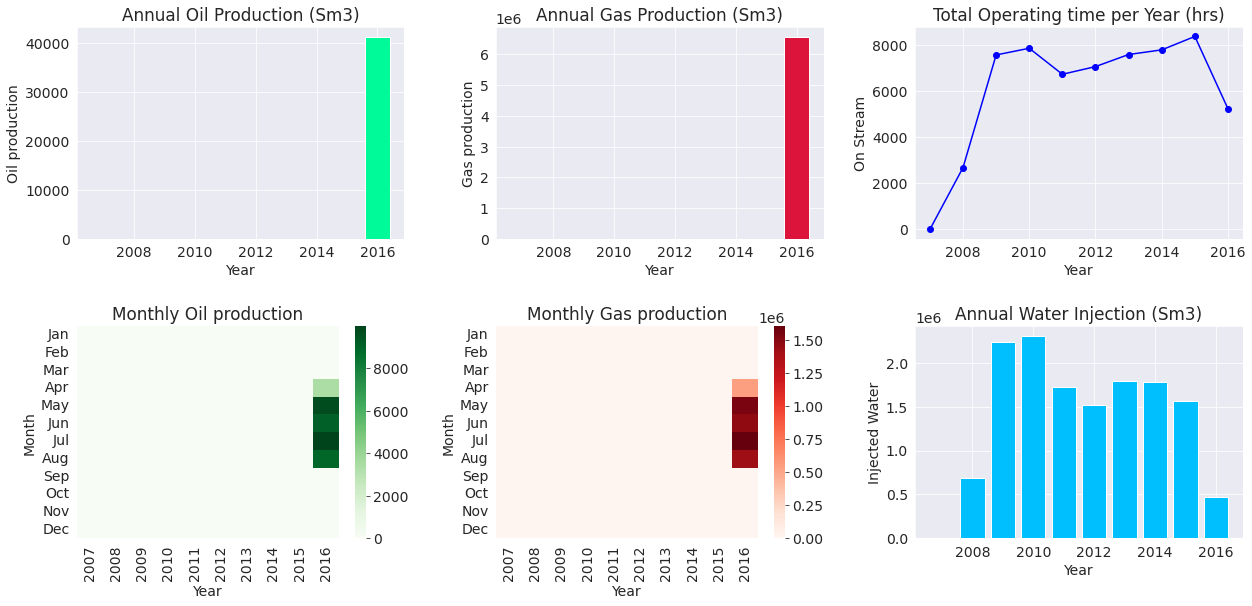

In [88]:
fig, axes = plt.subplots(2, 3, figsize=(18, 9))

# Annual Oil production
axes[0, 0].bar(well_f5_annual_df.index, well_f5_annual_df.Oil, color='mediumspringgreen')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Oil production')
axes[0, 0].set_title('Annual Oil Production (Sm3)')

# Annual Gas production
axes[0, 1].bar(well_f5_annual_df.index, well_f5_annual_df.Gas, color='crimson')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Gas production')
axes[0, 1].set_title('Annual Gas Production (Sm3)')

# Annual Operating time
axes[0, 2].plot(well_f5_annual_df.index, well_f5_annual_df['On Stream'], 'o-b')
axes[0, 2].set_xlabel('Year')
axes[0, 2].set_ylabel('On Stream')
axes[0, 2].set_title('Total Operating time per Year (hrs)')

# Monthly Oil production
axes[1, 0].set_title('Monthly Oil production')
sns.heatmap(well_f5_monthly_oil_df, cmap='Greens', ax=axes[1, 0])

# Monthly Gas production
axes[1, 1].set_title('Monthly Gas production')
sns.heatmap(well_f5_monthly_gas_df, cmap='Reds', ax=axes[1, 1])

# Annual Water Injection
axes[1, 2].bar(well_f5_annual_df.index, well_f5_annual_df.WI, color='deepskyblue')
axes[1, 2].set_xlabel('Year')
axes[1, 2].set_ylabel('Injected Water')
axes[1, 2].set_title('Annual Water Injection (Sm3)')


plt.tight_layout(pad=2)

## Well 15/9-F-12 : Production Well

In [89]:
well_f12_df = sorted_df[sorted_df['Wellbore name'] == '15/9-F-12'].drop(columns=['cum_oil', 'cum_gas', 'cum_water', 'total_production'])

In [90]:
well_f12_df.reset_index(drop=True, inplace=True)

In [91]:
well_f12_df.head()

,Wellbore name,NPDCode,Year,Month,On Stream,Oil,Gas,Water,GI,WI
0,15/9-F-12,5599,2008,Feb,407.0,49091.0,7068009.0,413.0,0.0,0.0
1,15/9-F-12,5599,2008,Mar,655.0,83361.0,12191171.0,27.0,0.0,0.0
2,15/9-F-12,5599,2008,Apr,614.0,74532.0,11506441.0,482.0,0.0,0.0
3,15/9-F-12,5599,2008,May,716.0,125479.0,19091872.0,16280.0,0.0,0.0
4,15/9-F-12,5599,2008,Jun,676.0,143787.0,21512334.0,474.0,0.0,0.0


In [92]:
well_f12_annual_df = well_f12_df.groupby('Year')[['On Stream', 'Oil', 'Gas', 'Water', 'GI', 'WI']].sum()

In [93]:
well_f12_annual_df

,On Stream,Oil,Gas,Water,GI,WI
Year,,,,,,
2008,7215.0,1173447.0,172189539.0,22525.0,0.0,0.0
2009,7975.0,1522542.0,213005139.0,53370.0,0.0,0.0
2010,8143.0,873829.0,125698981.0,905533.0,0.0,0.0
2011,6761.0,339718.0,51843940.0,1060416.0,0.0,0.0
2012,7078.0,225822.0,36029597.0,1339751.0,0.0,0.0
2013,7357.0,138155.0,22455058.0,1442132.0,0.0,0.0
2014,6880.0,57999.0,8830911.0,1404953.0,0.0,0.0
2015,8467.0,200201.0,29837371.0,341149.0,0.0,0.0
2016,5328.0,47900.0,7651741.0,263489.0,0.0,0.0


In [94]:
fig = px.bar(well_f12_annual_df,
             x=well_f12_annual_df.index,
             y=well_f12_annual_df.Oil,
             color_discrete_sequence=['mediumspringgreen'],
             height=580,
             title="<b>Annual Oil Production (Sm<sup>3</sup>)</b>")

fig.update_traces(marker_line_color='white', marker_line_width=1.2)

fig.update_layout(font_size=14)

fig.show()

In [95]:
fig = px.bar(well_f12_annual_df,
             x=well_f12_annual_df.index,
             y=well_f12_annual_df.Gas,
             color_discrete_sequence=['crimson'],
             height=580,
             title="<b>Annual Gas Production (Sm<sup>3</sup>)</b>")

fig.update_traces(marker_line_color='white', marker_line_width=1.2)

fig.update_layout(font_size=14)

fig.show()

In [96]:
well_f12_monthly_oil_df = well_f12_df.pivot_table('Oil', 'Month', 'Year')

In [97]:
well_f12_monthly_oil_df

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016
Month,,,,,,,,,
Jan,NaN,153677.0,149659.0,44747.0,18218.0,17409.0,4997.0,25713.0,9495.0
Feb,49091.0,121905.0,103026.0,29157.0,27362.0,15087.0,6101.0,19579.0,7644.0
Mar,83361.0,92959.0,101572.0,37395.0,26680.0,6306.0,6836.0,19341.0,7360.0
Apr,74532.0,150956.0,86254.0,37820.0,24088.0,12351.0,5892.0,19797.0,6152.0
May,125479.0,141039.0,77114.0,37205.0,22415.0,16313.0,3238.0,16996.0,5865.0
Jun,143787.0,132430.0,69617.0,22026.0,20887.0,11900.0,5751.0,19536.0,5408.0
Jul,114995.0,106105.0,64040.0,12462.0,21207.0,11862.0,5792.0,19157.0,4534.0
Aug,97822.0,112414.0,30117.0,36380.0,8998.0,15147.0,4448.0,13473.0,1442.0
Sep,77667.0,90099.0,51313.0,29999.0,1014.0,9224.0,5063.0,12495.0,0.0


In [98]:
well_f12_monthly_oil_df.fillna(0, inplace=True)

In [99]:
fig = px.imshow(well_f12_monthly_oil_df,
                color_continuous_scale='Greens',
                labels=dict(x='Year', y='Month'),
                title='<b>Monthly Oil Production</b>')

fig.update_traces(hovertemplate="<br>".join(['Year: %{x}', 'Month:  %{y}', 'Produced Oil (Sm<sup>3</sup>): %{z}']), name='')

fig.update_layout(font_size=14)

In [100]:
well_f12_monthly_gas_df = well_f12_df.pivot_table('Gas', 'Month', 'Year')

In [101]:
well_f12_monthly_gas_df

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016
Month,,,,,,,,,
Jan,NaN,22255224.0,21044604.0,6824001.0,2722573.0,2881179.0,766196.0,3780459.0,1487340.0
Feb,7068009.0,17427052.0,14520590.0,4519227.0,4289925.0,2461249.0,921967.0,2960674.0,1205549.0
Mar,12191171.0,13123547.0,14278519.0,5760219.0,4276186.0,1053666.0,1036071.0,2853433.0,1185894.0
Apr,11506441.0,20931108.0,12161146.0,5877461.0,3866150.0,2055292.0,883605.0,2889395.0,1015034.0
May,19091872.0,19366853.0,10970381.0,5801740.0,3630958.0,2757755.0,469664.0,2479620.0,925514.0
Jun,21512334.0,17787476.0,9944534.0,3412026.0,3394646.0,2037220.0,846734.0,2859707.0,870533.0
Jul,17116442.0,14721967.0,9283377.0,1823751.0,3444769.0,1919702.0,864046.0,2846821.0,729319.0
Aug,14143008.0,15676350.0,4346504.0,5446517.0,1376155.0,2354241.0,704538.0,2047121.0,232558.0
Sep,11185944.0,12553422.0,7750211.0,4566407.0,156920.0,1446819.0,803971.0,1888049.0,0.0


In [102]:
well_f12_monthly_gas_df.fillna(0, inplace=True)

In [103]:
fig = px.imshow(well_f12_monthly_gas_df,
                color_continuous_scale='Reds',
                labels=dict(x='Year', y='Month'),
                title='<b>Monthly Gas Production</b>')

fig.update_traces(hovertemplate="<br>".join(['Year: %{x}', 'Month:  %{y}', 'Produced Gas (Sm<sup>3</sup>): %{z}']), name='')

fig.update_layout(font_size=14)

fig.show()

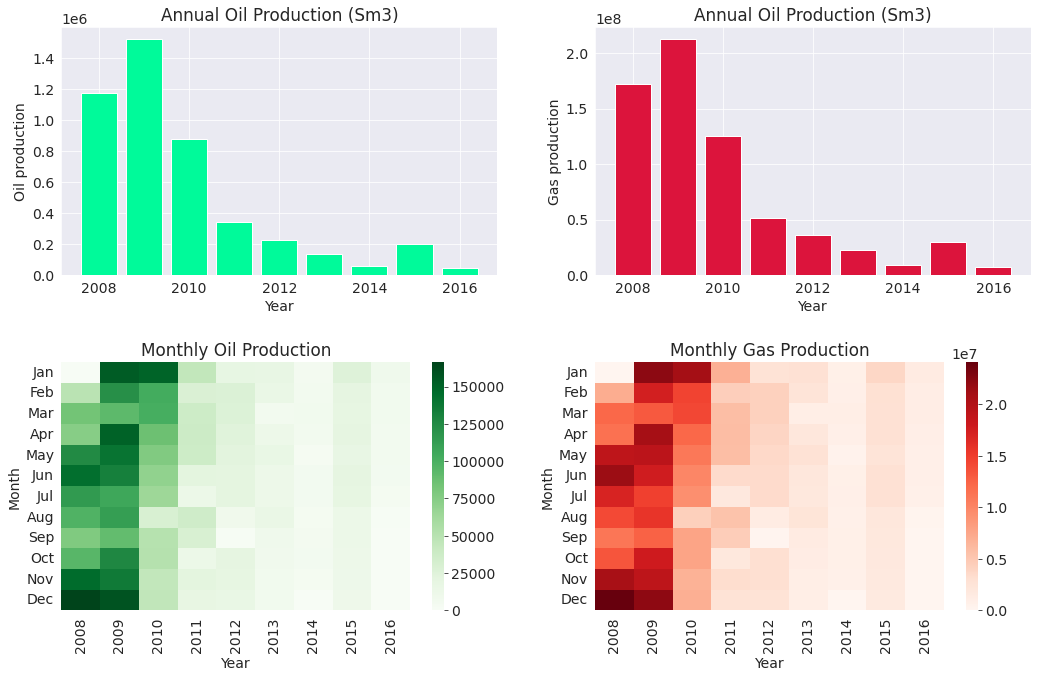

In [104]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))


axes[0, 0].bar(well_f12_annual_df.index, well_f12_annual_df.Oil, color='mediumspringgreen')
axes[0, 0].set_title('Annual Oil Production (Sm3)')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Oil production')

axes[0, 1].bar(well_f12_annual_df.index, well_f12_annual_df.Gas, color='crimson')
axes[0, 1].set_title('Annual Oil Production (Sm3)')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Gas production')

axes[1, 0].set_title('Monthly Oil Production')
sns.heatmap(well_f12_monthly_oil_df, cmap='Greens', ax=axes[1, 0])

axes[1, 1].set_title('Monthly Gas Production')
sns.heatmap(well_f12_monthly_gas_df, cmap='Reds', ax=axes[1, 1])


plt.tight_layout(pad=2)

So we have done the individual analysis of two (02) wellbores so far. However, since we have seven (07) wellbores, doing their analysis one after another would be a quite lenghty process. So it would be much better to have a function to which we would just have to pass the dataframe and the wellbore name, and get the detailed analysis of that wellbore.

So we are going to create four (04) functions:
* `cleanse_data()`: To clean and transform our data.
* `create_sorted_df()`: To create a sorted dataframe on which we will add additional series/columns.
* `create_well_df()`: To create data frame to store the data of a particular wellbore.
* `analyze_wellbore()`: To create subplots allowing us to analyze the wellbore using various plots depending on the type of the wellbore.

>**Note:** The function `analyze_wellbore()` will only analyze wellbore from which there was some hydrocarbon (Oil & Gas) production. Indeed, in the oil and gas industry, there is no need of analyzing an injection well, as we already know everything about that well. So the function we are going to create will not handle injection wells.

In [105]:
def cleanse_data(data):
    """
    Performs Cleaning and Transformation of any dataset in the format of the Volve field's "Monthly Production Data".


        Arguments
       -----------
        data (pd.DataFrame) : Production dataset. The passed data frame should be in the appropriate format.

        Returns
       -----------
        df (pd.DataFrame) : Cleaned copy of the passed dataset.

        Sample Link
       -------------
        https://github.com/Lamy237/hello-world/blob/main/volve_production_data.csv

    """
    import pandas as pd
    import calendar
    import sys


    if not isinstance(data, pd.DataFrame):
        sys.exit('Invalid input, please enter a dataframe.') # Still get an error I don't want here

    df = data.copy()

    # Verify that the format is respected
    columns = ['Wellbore name', 'NPDCode', 'Year', 'Month', 'On Stream', 'Oil', 'Gas', 'Water', 'GI', 'WI']
    for a, b in zip(columns, df.columns):
        if a != b:
            sys.exit('Please make sure the entered dataset respects the default format.')

    # Drop the first row
    df.drop([0], inplace=True)
    df.reset_index(drop=True, inplace=True)

    # Data cleaning
    df.fillna(0, inplace=True)
    df[['Oil', 'Gas', 'Water', 'GI', 'WI']] = df[['Oil', 'Gas', 'Water', 'GI', 'WI']].replace(',', '', regex=True)

    # Data transformation
    df[['NPDCode', 'Year', 'Month']] = df[['NPDCode', 'Year', 'Month']].astype(int)
    df[['On Stream', 'Oil', 'Gas', 'Water', 'GI', 'WI']] = df[['On Stream', 'Oil', 'Gas', 'Water', 'GI', 'WI']].astype(float)

    # Change numbers into month abbreviation
    abbrev = dict(enumerate(calendar.month_abbr))
    df['Month'] = df['Month'].map(abbrev)

    # Specify a custom order in which you want the months to be sorted. Otherwise they will be sorted by alphabetic order.
    df['Month'] = pd.Categorical(df.Month,
                                 categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                                 ordered=True)

    return df

In [106]:
def create_sorted_df(data):
    """
    Creates a sorted data frame from any dataset in the format of the Volve field's "Monthly Production Data".


        Arguments
       -----------
        data (pd.DataFrame) : Data frame to be sorted. The passed data frame should be in the appropriate format.

        Returns
       -----------
        df (pd.DataFrame) : The result data frame is sorted by Year, then by Month. Three (03) columns are also added
                    to account for the cumulated Oil, Gas, and Water production respectively.

        Sample Link
       -------------
        https://github.com/Lamy237/hello-world/blob/main/volve_production_data.csv

    """
    import pandas as pd


    # Clean and transform the data
    data = cleanse_data(data)

    # Sort the dataframe by Year, then by Month
    df = data.sort_values(['Year', 'Month'])
    df.reset_index(drop=True, inplace=True)

    # Add additional columns for the cumulated production of each fluid
    df['cum_oil'] = df.Oil.cumsum()
    df['cum_gas'] = df.Gas.cumsum()
    df['cum_water'] = df.Water.cumsum()

    return df

In [107]:
def create_well_df(data, well_name):
    """
    Creates a data frame to store the data of a particular wellbore.


        Arguments
       -----------
        data (pd.DataFrame) : Production dataset. The passed data frame should be in the appropriate format.

        well_name (str) : Specifies the name of the wellbore you want to create a dataframe of.

        Returns
       -----------
        df (pd.DataFrame) : Returns a data frame that contains all the production and/or injection data
                    of a particular wellbore.

        Sample Link
       -------------
        https://github.com/Lamy237/hello-world/blob/main/volve_production_data.csv

    """
    import pandas as pd
    import sys

    # Clean, transform, and sort the data
    df = create_sorted_df(data)

    # Check the validity of the entered wellbore name
    if not isinstance(well_name, str):
        sys.exit(f"Argument 'well_name' should be passed as a string, received '{type(well_name)}'")
    elif well_name.upper() not in df['Wellbore name'].unique():
        sys.exit('Invalid input, please enter a valid Wellbore name.')
    else:
        well_name = well_name.upper()

    # Querying the data of the entered wellbore name
    data_well = df[df['Wellbore name'] == well_name].drop(columns=['cum_oil', 'cum_gas', 'cum_water']).reset_index(drop=True)

    return data_well

In [108]:
def analyze_wellbore(data, well_name):
    """
    Creates a grid made up of four (04) to six (06) subplots that allow us to analyze a particular wellbore including:

     - The annual Oil & Gas production (barplots)
     - The monthly Oil & Gas production (heatmaps)
     - The total operating time (lineplot)
     - The total fluid injection (barplot)

     Note: This function does not handle injection wells


        Arguments
       -----------
        data (pd.DataFrame) : Production dataset. The passed data frame should be in the appropriate format.

        Sample Link
       -------------
        https://github.com/Lamy237/hello-world/blob/main/volve_production_data.csv

    """

    import matplotlib.pyplot as plt
    import matplotlib
    import seaborn as sns
    import pandas as pd
    import math
    import sys


    # Querying the data of the entered wellbore name
    data_well = create_well_df(data, well_name)

    # Creating sub data frames
    data_year = data_well.groupby('Year')[['On Stream', 'Oil', 'Gas', 'Water', 'GI', 'WI']].sum()
    data_month_oil = data_well.pivot_table('Oil', 'Month', 'Year')
    data_month_gas = data_well.pivot_table('Gas', 'Month', 'Year')

    data_month_oil.fillna(0, inplace=True)
    data_month_gas.fillna(0, inplace=True)

    # Setting default properties
    sns.set_style('darkgrid')
    matplotlib.rcParams['font.size'] = 14
    matplotlib.rcParams['figure.facecolor'] = '#00000000'

    # To avoid getting decimal values on the X-axis while plotting the annual production
    xint = range(math.floor(min(data_year.index)), math.ceil(max(data_year.index)+1))

    # Read this carefully and make sure you understand what's going on
    col = 3 if data_year.WI.sum() > 0 or data_year.GI.sum() > 0 else 2
    fig_size = (18, 9) if data_year.WI.sum() > 0 or data_year.GI.sum() > 0 else (15, 10)


    if data_year.Oil.sum() > 0 or data_year.Gas.sum() > 0 or data_year.Water.sum() > 0:

        fig, axes = plt.subplots(2, col, figsize=fig_size)

        # Annual Oil Production
        axes[0, 0].bar(data_year.index, data_year.Oil, color='mediumspringgreen')
        axes[0, 0].set_xlabel('Year')
        axes[0, 0].set_ylabel('Oil production')
        axes[0, 0].set_title('Annual Oil Production (Sm3)')

        # Annual Gas Production
        axes[0, 1].bar(data_year.index, data_year.Gas, color='crimson')
        axes[0, 1].set_xlabel('Year')
        axes[0, 1].set_ylabel('Gas production')
        axes[0, 1].set_title('Annual Gas Production (Sm3)')

        # Monthly Oil Production
        axes[1, 0].set_title('Monthly Oil production')
        sns.heatmap(data_month_oil, cmap='Greens', ax=axes[1, 0])

        # Monthly Gas Production
        axes[1, 1].set_title('Monthly Gas production')
        sns.heatmap(data_month_gas, cmap='Reds', ax=axes[1, 1])


        if data_year.WI.sum() > 0 and data_year.GI.sum() > 0:

            # Total Operating time per year
            axes[0, 2].plot(data_year.index, data_year['On Stream'], 'o-b')
            axes[0, 2].set_xlabel('Year')
            axes[0, 2].set_ylabel('On Stream')
            axes[0, 2].set_title('Total Operating time per Year (hrs)')

            # Total fluid injection per year
            axes[1, 2].bar(data_year.index, data_year.GI, color='salmon')
            axes[1, 2].bar(data_year.index, data_year.WI, bottom=data_year.GI, color='deepskyblue')
            axes[1, 2].set_xlabel('Year')
            axes[1, 2].set_ylabel('Injected Fluid')
            axes[1, 2].legend(['Gas', 'Oil'])
            axes[1, 2].set_title('Annual Fluid Injection (Sm3)')

        elif data_year.WI.sum() > 0 and data_year.GI.sum() == 0:

            # Total Operating time per year
            axes[0, 2].plot(data_year.index, data_year['On Stream'], 'o-b')
            axes[0, 2].set_xlabel('Year')
            axes[0, 2].set_ylabel('On Stream')
            axes[0, 2].set_title('Total Operating time per Year (hrs)')

            # Total Water injection per year
            axes[1, 2].bar(data_year.index, data_year.WI, color='deepskyblue')
            axes[1, 2].set_xlabel('Year')
            axes[1, 2].set_ylabel('Injected Water')
            axes[1, 2].set_title('Annual Water Injection (Sm3)')

        elif data_year.WI.sum() == 0 and data_year.GI.sum() > 0:

            # Total Operating time per year
            axes[0, 2].plot(data_year.index, data_year['On Stream'], 'o-b')
            axes[0, 2].set_xlabel('Year')
            axes[0, 2].set_ylabel('On Stream')
            axes[0, 2].set_title('Total Operating time per Year (hrs)')

            # Total Gas injection per year
            axes[1, 2].bar(data_year.index, data_year.GI, color='crimson')
            axes[1, 2].set_xlabel('Year')
            axes[1, 2].set_ylabel('Injected Gas')
            axes[1, 2].set_title('Annual Gas Injection (Sm3)')

        else:
            axes[0, 0].xaxis.set_ticks(xint)
            axes[0, 1].xaxis.set_ticks(xint)

        plt.tight_layout(pad=2)

Now let's invoke our newly created function to see how it works. First of all, we will have to reload the original dataset, as we already applied some modifications on the one we have been using from the beginning of this notebook.

In [109]:
df = pd.read_csv('./volve_production_data.csv')

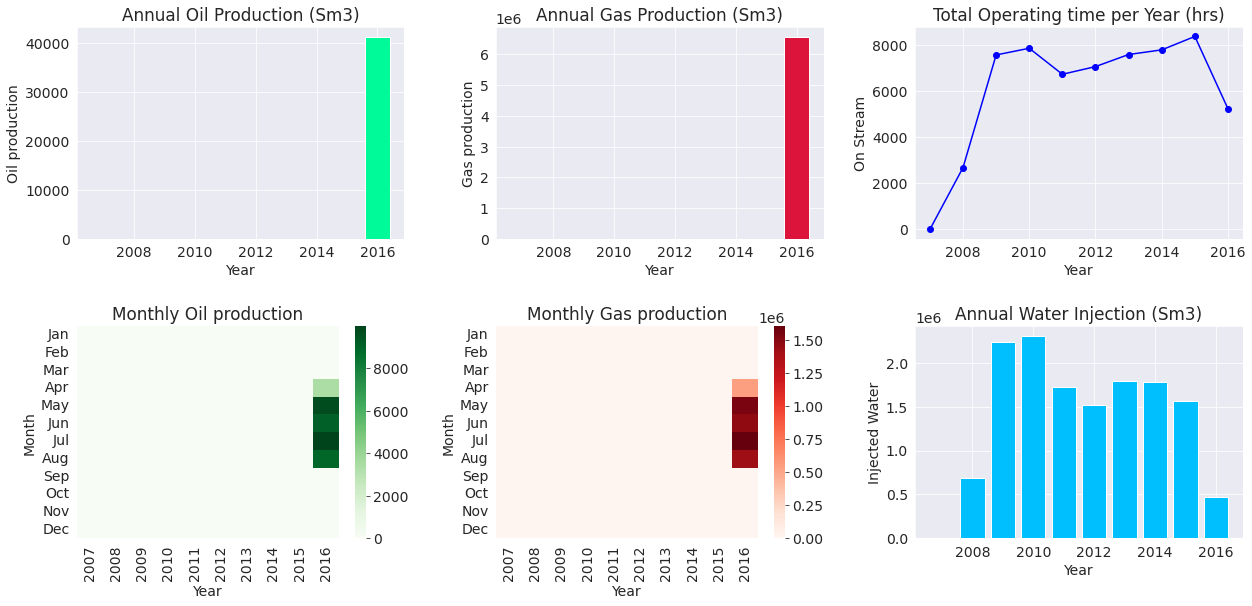

In [110]:
analyze_wellbore(df, '15/9-F-5')

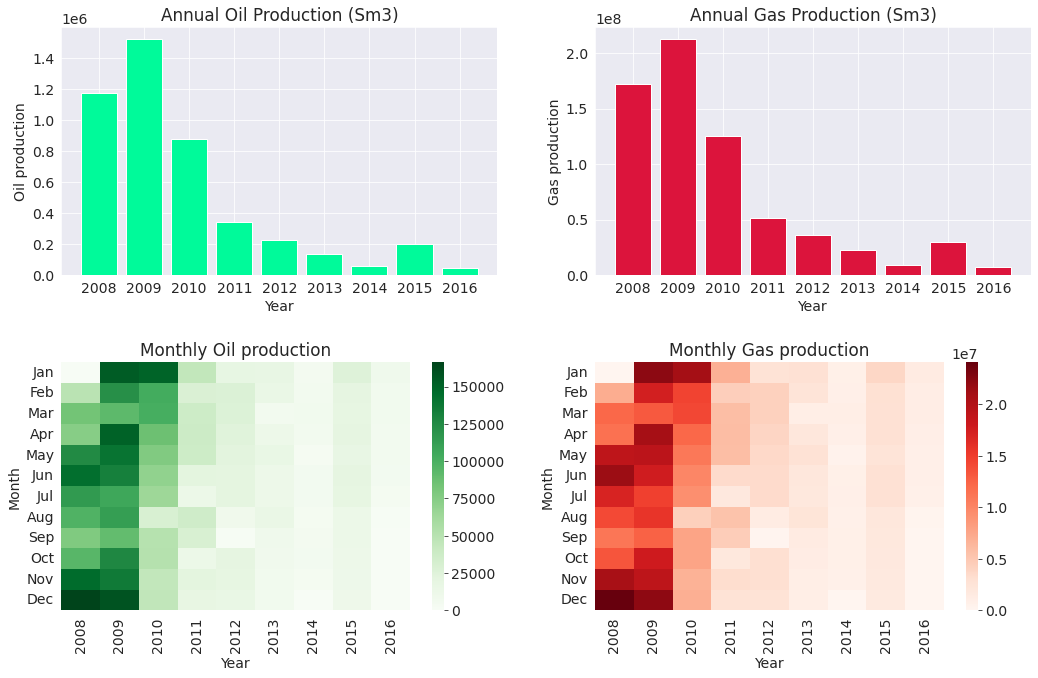

In [111]:
analyze_wellbore(df, '15/9-F-12')

As you can see, we can now make a detailed analysis of any wellbore by just calling the function `analyze_wellbore()` and get different plots depending on the type of the wellbore.

## References

* [Find out more about the Volve field](https://www.equinor.com/en/what-we-do/norwegian-continental-shelf-platforms/volve.html)

* [Instructions on how to download the Volve dataset](https://discovervolve.com/2020/03/05/how-to-access-the-volve-dataset/)